In [2]:
from transformers import pipeline

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from PIL import Image

from urllib.request import urlopen

In [3]:
text_classifier = pipeline("sentiment-analysis")
text_classifier("We are very happy to show you the 🤗 Transformers library.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [4]:
text_generator = pipeline("text-generation")
text_generator("Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/opt/mambaforge/envs/cs152/lib/python3.10/site-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': "Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, Nine for them the High King's throne, Ten for the Dragon-lords in their temples, Eleven for a host of other Lords"}]

In [5]:
text_unmasker = pipeline("fill-mask")
text_unmasker(f"HuggingFace is creating a {text_unmasker.tokenizer.mask_token} that the community uses to solve NLP tasks.")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.17927487194538116,
  'token': 3944,
  'token_str': ' tool',
  'sequence': 'HuggingFace is creating a tool that the community uses to solve NLP tasks.'},
 {'score': 0.11349419504404068,
  'token': 7208,
  'token_str': ' framework',
  'sequence': 'HuggingFace is creating a framework that the community uses to solve NLP tasks.'},
 {'score': 0.052435532212257385,
  'token': 5560,
  'token_str': ' library',
  'sequence': 'HuggingFace is creating a library that the community uses to solve NLP tasks.'},
 {'score': 0.034935589879751205,
  'token': 8503,
  'token_str': ' database',
  'sequence': 'HuggingFace is creating a database that the community uses to solve NLP tasks.'},
 {'score': 0.028602493926882744,
  'token': 17715,
  'token_str': ' prototype',
  'sequence': 'HuggingFace is creating a prototype that the community uses to solve NLP tasks.'}]

In [6]:
text_translator = pipeline("translation_en_to_fr")
text_translator("Hugging Face is a technology company based in New York and Paris")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
/opt/mambaforge/envs/cs152/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:156: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': 'Hugging Face est une entreprise technologique basée à New York et à Paris.'}]

In [7]:
text_question_answer = pipeline(model="deepset/roberta-base-squad2")
text_question_answer(question="Where do I live?", context="My name is Wolfgang and I live in Berlin")

Downloading:   0%|          | 0.00/9.24k [00:00<?, ?B/s]

{'score': 0.9190709590911865, 'start': 34, 'end': 40, 'answer': 'Berlin'}

In [8]:
image_classifier = pipeline(task="image-classification")
image_classifier(images="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.4334990382194519, 'label': 'lynx, catamount'},
 {'score': 0.034796200692653656,
  'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'},
 {'score': 0.03240193799138069,
  'label': 'snow leopard, ounce, Panthera uncia'},
 {'score': 0.02394481562077999, 'label': 'Egyptian cat'},
 {'score': 0.022889282554388046, 'label': 'tiger cat'}]

Downloading:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/opt/mambaforge/envs/cs152/lib/python3.10/site-packages/transformers/models/detr/feature_extraction_detr.py:1344: UserWarning: `label_ids_to_fuse` unset. No instance will be fused.
  warnings.warn("`label_ids_to_fuse` unset. No instance will be fused.")


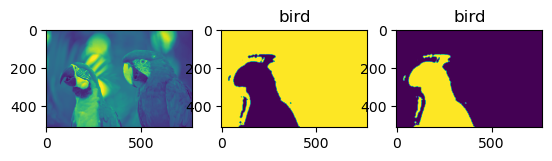

In [9]:
image_url = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"

image_segmenter = pipeline(model="facebook/detr-resnet-50-panoptic")
segments = image_segmenter(image_url)

num_axes = len(segments) + 1
_, axes = plt.subplots(1, num_axes)
axes[0].imshow(Image.open(urlopen(image_url)))

for ax, seg in zip(axes[1:], segments):
    ax.imshow(seg["mask"])
    ax.set_title(seg["label"])

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
/opt/mambaforge/envs/cs152/lib/python3.10/site-packages/transformers/models/detr/feature_extraction_detr.py:851: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


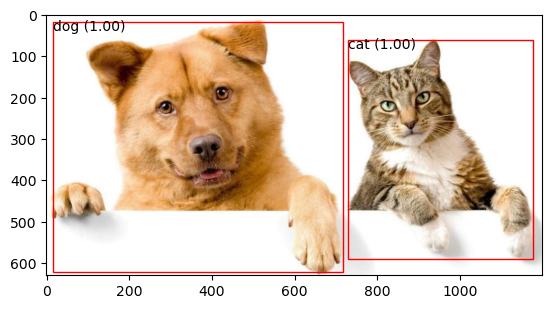

In [10]:
image_detector = pipeline("object-detection")
id_in = (
    "https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-cover.jpg"
)
id_out = image_detector(id_in)

img = Image.open(urlopen(id_in))
plt.imshow(img)

for out in id_out:
    x, y = out["box"]["xmin"], out["box"]["ymin"]
    width = out["box"]["xmax"] - out["box"]["xmin"]
    height = out["box"]["ymax"] - out["box"]["ymin"]
    plt.gca().add_patch(
        Rectangle((x, y), width, height, linewidth=1, edgecolor="r", facecolor="none")
    )
    plt.text(x, y + 20, f"{out['label']} ({out['score']:.2f})")

In [11]:
image_captioner = pipeline(model="ydshieh/vit-gpt2-coco-en")
image_captioner("https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png")

Downloading:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

/opt/mambaforge/envs/cs152/lib/python3.10/site-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'two birds are standing next to each other '}]

In [12]:
vqa = pipeline(task="vqa")
vqa(
    image="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg",
    question="Where is the cat?"
)

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision 4355f59 (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.9110307693481445, 'answer': 'snow'},
 {'score': 0.8786001205444336, 'answer': 'in snow'},
 {'score': 0.6714204549789429, 'answer': 'outside'},
 {'score': 0.029327455908060074, 'answer': 'on ground'},
 {'score': 0.027217475697398186, 'answer': 'ground'}]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/50 [00:00<?, ?it/s]

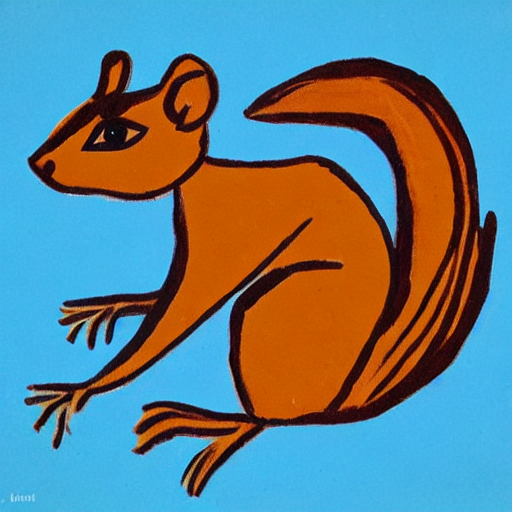

In [13]:
from diffusers import DiffusionPipeline

image_generator = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
image_generator.to("cuda")
image_generator("An image of a squirrel in Picasso style").images[0]

In [16]:
result = image_generator("A student at Pomona College")

  0%|          | 0/50 [00:00<?, ?it/s]

In [20]:
result.images

[<PIL.Image.Image image mode=RGB size=512x512>]

Using cache found in /home/ajcd2020/.cache/torch/hub/AK391_animegan2-pytorch_main
Using cache found in /home/ajcd2020/.cache/torch/hub/AK391_animegan2-pytorch_main


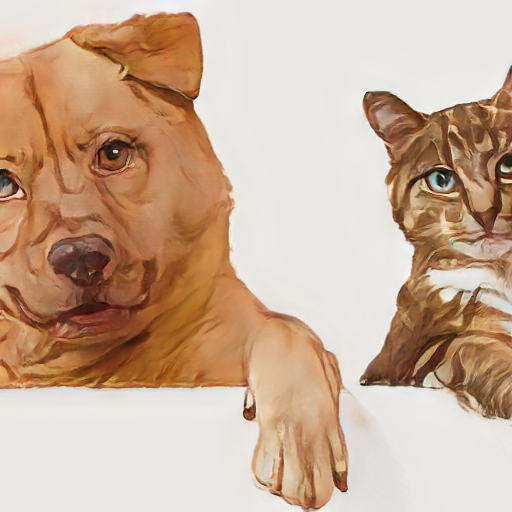

In [14]:
from torch import hub

model = hub.load(
    "AK391/animegan2-pytorch:main",
    "generator",
    pretrained=True,
    device="cuda",
    progress=True,
)

face2paint = hub.load(
    'AK391/animegan2-pytorch:main', 'face2paint', 
    size=512, device="cuda",side_by_side=False
)

face2paint(model, img)